## Import tensorflow gpu

In [28]:
import tensorflow as tf

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.7.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Load the images

In [29]:
import os

current_dir = os.path.abspath(os.getcwd())
folder = "\\New Masks Dataset"
train_folder = current_dir + folder + "\\Train"
val_folder = current_dir + folder + "\\Validation"
test_folder = current_dir + folder + "\\Test"

In [30]:
from tensorflow.keras.utils import image_dataset_from_directory



train_dataset = image_dataset_from_directory(train_folder,
                                             image_size=(180, 180),
                                             batch_size=64)

validation_dataset = image_dataset_from_directory(val_folder,
                                                  image_size=(180, 180),
                                                  batch_size=64)

test_dataset = image_dataset_from_directory(test_folder,
                                            image_size=(180, 180),
                                            batch_size=64)

Found 600 files belonging to 2 classes.
Found 306 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


## Train model

In [31]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

#model = keras.Sequential()

model = keras.Sequential(
    [
        Rescaling(scale=1.0/255),
        RandomFlip("horizontal"),
        RandomRotation(0.1),
        RandomZoom(0.2),
    ]
)

#model.add(Rescaling(scale=1.0/255))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [
    ModelCheckpoint(
        filepath="model1.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
10/10 [==============================] - 3s 205ms/step - loss: 1.0112 - accuracy: 0.5567 - val_loss: 0.6196 - val_accuracy: 0.5686
Epoch 2/20
10/10 [==============================] - 2s 191ms/step - loss: 0.4651 - accuracy: 0.8383 - val_loss: 0.4492 - val_accuracy: 0.8203
Epoch 3/20
10/10 [==============================] - 2s 190ms/step - loss: 0.3308 - accuracy: 0.8733 - val_loss: 0.2227 - val_accuracy: 0.9216
Epoch 4/20
10/10 [==============================] - 2s 178ms/step - loss: 0.2646 - accuracy: 0.8867 - val_loss: 0.2505 - val_accuracy: 0.9085
Epoch 5/20
10/10 [==============================] - 2s 177ms/step - loss: 0.2754 - accuracy: 0.9050 - val_loss: 0.2308 - val_accuracy: 0.9118
Epoch 6/20
10/10 [==============================] - 2s 189ms/step - loss: 0.2299 - accuracy: 0.9217 - val_loss: 0.2423 - val_accuracy: 0.9085
Epoch 7/20
10/10 [==============================] - 2s 179ms/step - loss: 0.2317 - accuracy: 0.9150 - val_loss: 0.2532 - val_accuracy: 0.9020
Epoch 

## Plot results of train

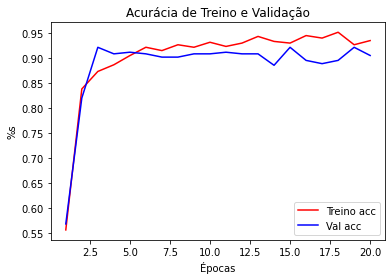

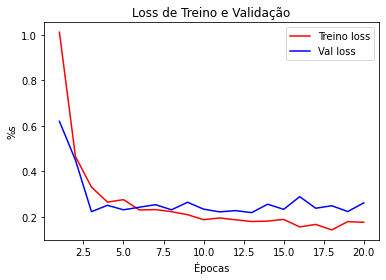

In [33]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "r", label="Treino acc")
plt.plot(epochs, val_accuracy, "b", label="Val acc")
plt.xlabel("Épocas")
plt.ylabel("%s")
plt.title("Acurácia de Treino e Validação")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Treino loss")
plt.plot(epochs, val_loss, "b", label="Val loss")
plt.xlabel("Épocas")
plt.ylabel("%s")
plt.title("Loss de Treino e Validação")
plt.legend()
plt.show()

## Result of test dataset

In [34]:
from tensorflow import keras
model = keras.models.load_model("model1.keras")

In [35]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

2/2 [==============================] - 0s 19ms/step - loss: 0.1909 - accuracy: 0.9500
Test accuracy: 0.950


## View classification of unique image

In [36]:
from matplotlib import pyplot as plt

def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize': 20, 'fontweight': 'medium'})
    plt.show()

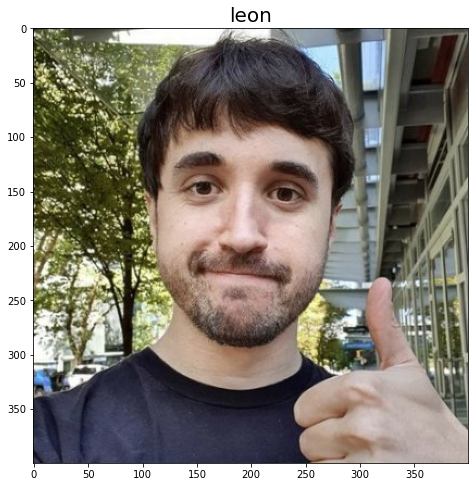

In [37]:
import cv2
leon_img = cv2.imread("leon.jpg")
leon_img = cv2.cvtColor(leon_img, cv2.COLOR_BGR2RGB)
#leon_img = cv2.resize(leon_img, (180, 180), interpolation = cv2.INTER_AREA)

showSingleImage(leon_img, "leon", (12, 8))

In [38]:
from keras.preprocessing import image
import numpy as np

leon_img = image.load_img("leon.jpg", target_size=(180, 180))
x = image.img_to_array(leon_img)
x = np.expand_dims(x, axis=0)
pred=(model.predict(x) > 0.5).astype('int32')[0][0]

print(pred)
    
print(model.predict(x))

1
[[0.9816836]]
